# TASK-3: COMPARISION BETWEEN UNIFIED WSD AND WIKI BASED APPROACH

In [ ]:
#Import necessery libray and functions
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Function for parsing xml file**

In [ ]:
import xml.etree.ElementTree as ET

# Load and parse semcor.data.xml
tree = ET.parse('/content/drive/MyDrive/Colab Notebooks/NLP/Project/SemCor/semcor.data.xml')
root = tree.getroot()

def find_sentences_with_word(word):
    sentences_with_word = []

    # Loop through each sentence in the XML file
    for text in root.findall('text'):
        for sentence in text.findall('sentence'):
            sentence_elements = []
            matching_ids = []  # List to store instance IDs of matching words

            # Check each word element in the sentence
            for word_element in sentence:
                sentence_elements.append(word_element.text)

                # Check if the word's lemma matches the search term
                if word_element.attrib.get('lemma') == word:
                    instance_id = word_element.attrib.get('id')
                    if instance_id:
                        matching_ids.append(instance_id)

            # If matching instance IDs are found, add the sentence and IDs to the list
            if matching_ids:
                sentence_text = ' '.join(sentence_elements)
                sentences_with_word.append((word, sentence_text, matching_ids))

    return sentences_with_word

# Example usage
target_word = "chair"
sentences = find_sentences_with_word(target_word)
for i, (word, sentence, ids) in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")
    print(f"  Matching instance IDs: {ids}")


Sentence 1: In 1803 Oersted returned to Copenhagen and applied for the university 's chair in physics but was rejected because he was probably considered more a philosopher than a physicist .
  Matching instance IDs: ['d005.s038.t005']
Sentence 2: He was , however , fortunate in his contact with Prof. J. G. L. Manthey ( 1769 - 1842 ) , teacher of chemistry , who , in addition to his academic chair , was also proprietor of the `` Lion Pharmacy '' in Copenhagen where Oersted assisted him .
  Matching instance IDs: ['d005.s042.t008']
Sentence 3: Mr. Blatz sat down in the only unoccupied kitchen chair .
  Matching instance IDs: ['d022.s102.t004']
Sentence 4: Without taking off his coat , he sat in the blue chair which still faced the closed bedroom door .
  Matching instance IDs: ['d025.s078.t004']
Sentence 5: He rose from the chair , took off his coat .
  Matching instance IDs: ['d025.s090.t001']
Sentence 6: is Bill 's broken a chair , dominant stress will usually be on the complement a c

**1. Pick 10 target words**

**2. Pick 3 context sentences per word from xml file**




In [ ]:
#List of 10 target_word
target_words = ["long", "chair", "objective", "benefit", "service", "program",
                "permit", "giveaway", "rather", "goal"]

context_sentences = []
for target_word in target_words:
  sentences = find_sentences_with_word(target_word)[0:3]
  context_sentences.extend(sentences)

#Convert contex_sentences into a dtaframe
import pandas as pd
sentence_instance_id_table = pd.DataFrame(context_sentences, columns = ['target_word', 'sentence', 'instance_id'])
sentence_instance_id_table

,target_word,sentence,instance_id
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000]
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002]
2,long,Two millions were added to what had been set a...,[d001.s081.t007]
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005]
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008]
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004]
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003]
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002]
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001]
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004]


In [ ]:
print(type(sentence_instance_id_table['instance_id'][25]))

<class 'list'>


Save the file in a folder

In [ ]:
#save the table to a folder so that you can use it whenever you need it
sentence_instance_id_table.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/sentence_instance_id_table.csv', index=False)

#Read the data from the file a dataframe
#sentence_instance_id_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/sentence_instance_id_table.csv')
sentence_instance_id_table

,target_word,sentence,instance_id
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000]
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002]
2,long,Two millions were added to what had been set a...,[d001.s081.t007]
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005]
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008]
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004]
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003]
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002]
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001]
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004]


Read gold key file

In [ ]:
#Read goldkey data as a dataframe
semcor_gold_data_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Project/SemCor/semcor.gold.key.txt'

data = []

with open(semcor_gold_data_path, 'r') as f:
    for line in f:
      instance_id, sense_key = line.strip().split(' ', 1)
      word, number = sense_key.split('%', 1)
      sense_number = number.split(':')[0]
      data.append({'instance_id': instance_id, 'sense_key': sense_key, 'word': word, 'number':number, 'sense_number':sense_number})

gold_key_table = pd.DataFrame(data)
gold_key_table

,instance_id,sense_key,word,number,sense_number
0,d000.s000.t000,long%3:00:02::,long,3:00:02::,3
1,d000.s000.t001,be%2:42:03::,be,2:42:03::,2
2,d000.s000.t002,review%2:31:00::,review,2:31:00::,2
3,d000.s000.t003,objective%1:09:00::,objective,1:09:00::,1
4,d000.s000.t004,benefit%1:21:00::,benefit,1:21:00::,1
...,...,...,...,...,...
226031,d351.s076.t000,give%2:40:05::,give,2:40:05::,2
226032,d351.s076.t001,be%2:42:03::,be,2:42:03::,2
226033,d351.s076.t002,gain%2:40:03::,gain,2:40:03::,2
226034,d351.s076.t003,make%2:41:00::,make,2:41:00::,2


In [ ]:
#save gold key as dataframe
gold_key_table.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/gold_key_table.csv', index=False)

#Read the data from the csv file as a dataframe
#gold_key_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/gold_key_table.csv')
gold_key_table

,instance_id,sense_key,word,number,sense_number
0,d000.s000.t000,long%3:00:02::,long,3:00:02::,3
1,d000.s000.t001,be%2:42:03::,be,2:42:03::,2
2,d000.s000.t002,review%2:31:00::,review,2:31:00::,2
3,d000.s000.t003,objective%1:09:00::,objective,1:09:00::,1
4,d000.s000.t004,benefit%1:21:00::,benefit,1:21:00::,1
...,...,...,...,...,...
226031,d351.s076.t000,give%2:40:05::,give,2:40:05::,2
226032,d351.s076.t001,be%2:42:03::,be,2:42:03::,2
226033,d351.s076.t002,gain%2:40:03::,gain,2:40:03::,2
226034,d351.s076.t003,make%2:41:00::,make,2:41:00::,2


**function to extract sense key using instance id from the gold key file**

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

def get_sense_key(instance_id):
    # Search for the instance_id in the DataFrame
    result = gold_key_table.loc[gold_key_table['instance_id'] == instance_id, 'sense_key']

    # Check if the instance_id was found
    if not result.empty:
        return result.iloc[0]  # Return the first matching sense key
    else:
        return "Instance ID not found"

# Example usage
instance_id = 'd000.s000.t001'
sense_key = get_sense_key(instance_id)
print(f"The sense key for {instance_id} is: {sense_key}")

The sense key for d000.s000.t001 is: be%2:42:03::


Disambiguate a word using wordnet

In [ ]:
from nltk.corpus import wordnet as wn

#Figuring out the sense defination from the wordnet
def get_defination_from_sense_key(sense_key):
  if sense_key == "Instance ID not found":
    return "Defination not fount"
  # Split the sense key to get the word and the sense number
  word, sense_number = sense_key.split('%', 1)

  # Remove the part after the colon in sense_number
  sense_number = sense_number.split(':', 1)[0]

  # Get synsets for the word
  synsets = wn.synsets(word)

  # Find the specific synset based on the sense number
  for synset in synsets:
      if synset.name().endswith(sense_number):
          return synset.definition()  # Return the definition

  return "Definition not found."

# Example usage
sense_key = 'long%3:00:02::'
definition = get_defination_from_sense_key(sense_key)
print(f"The definition for {sense_key} is: {definition}")

The definition for long%3:00:02:: is: of relatively great height; - Sherwood Anderson


4. Find sense key for each instance ID
5. Find wordnet definition from the sense key


In [ ]:
import pandas as pd

def create_sense_key_table(sentence_instance_id_table, gold_key_table):
    new_rows = []


    for _, row in sentence_instance_id_table.iterrows():
        target_word = row['target_word']
        sentence = row['sentence']
        instance_ids = row['instance_id']
        sense_keys = []
        definations = []


        for instance_id in instance_ids:
            sense_key = get_sense_key(instance_id)
            defination = get_defination_from_sense_key(sense_key)

            sense_keys.append(sense_key)
            definations.append(defination)


        new_rows.append({
              'target_word': target_word,
              'sentence': sentence,
              'instance ids': instance_ids,
              'sense key': sense_keys,
              'defination': definations
          })

    # Create a new DataFrame from the new_rows list
    sense_key_table = pd.DataFrame(new_rows)
    return sense_key_table


sense_key_and_defination_table = create_sense_key_table(sentence_instance_id_table, gold_key_table)
sense_key_and_defination_table


,target_word,sentence,instance ids,sense key,defination
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000],[long%3:00:02::],[of relatively great height; - Sherwood Anderson]
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002],[long%3:00:01::],[of relatively great height; - Sherwood Anderson]
2,long,Two millions were added to what had been set a...,[d001.s081.t007],[long%3:00:02::],[of relatively great height; - Sherwood Anderson]
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005],[chair%1:04:00::],"[a seat for one person, with a support for the..."
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008],[chair%1:04:00::],"[a seat for one person, with a support for the..."
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004],[chair%1:06:00::],"[a seat for one person, with a support for the..."
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004],[benefit%1:21:00::],[financial assistance in time of need]


In [ ]:
#save and read the table
sense_key_and_defination_table.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/sense_key_and_defination_table.csv', index=False)
#sense_key_and_defination_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/sense_key_and_defination_table.csv')
sense_key_and_defination_table

,target_word,sentence,instance ids,sense key,defination
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000],[long%3:00:02::],[of relatively great height; - Sherwood Anderson]
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002],[long%3:00:01::],[of relatively great height; - Sherwood Anderson]
2,long,Two millions were added to what had been set a...,[d001.s081.t007],[long%3:00:02::],[of relatively great height; - Sherwood Anderson]
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005],[chair%1:04:00::],"[a seat for one person, with a support for the..."
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008],[chair%1:04:00::],"[a seat for one person, with a support for the..."
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004],[chair%1:06:00::],"[a seat for one person, with a support for the..."
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001],[objective%1:09:00::],[undistorted by emotion or personal bias; base...
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004],[benefit%1:21:00::],[financial assistance in time of need]


In [ ]:
!pip install nltk wikipedia-api
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

#modified lesk implementation
def lesk_similarity(context_sentence, sense_defination):
  context_tokens = set(word_tokenize(context_sentence.lower()))
  sense_def_tokens = set(word_tokenize(sense_defination.lower()))
  overlap = len(sense_def_tokens.intersection(context_tokens))
  return overlap

6. Find wiki definition using target word and context sentence
7. ompare wordnet definition and wiki definition


In [ ]:

import wikipediaapi
#search the target word on wikipedia
agent = "Project_Task_1_2_3/1.0 (abutaher.kuet.ece@gmail.com)"
wiki_wiki = wikipediaapi.Wikipedia(language='en', extract_format=wikipediaapi.ExtractFormat.WIKI, user_agent=agent) # Corrected instantiation of Wikipedia object

def search_targetword_on_wiki(word):
  main_page = wiki_wiki.page(f"{word} (disambiguation)")
  senses = []
  if main_page.exists():
    for link in main_page.links.values():
      sense_page = wiki_wiki.page(link.title)
      if sense_page.exists() and sense_page.summary:
        senses.append((link.title, sense_page.text))

  else:
      main_page = wiki_wiki.page(word)
      if main_page.exists() and main_page.summary:
        senses.append((word, main_page.text))
  return senses


#Use wiki for lexical resourse (sense, text) for disambiguation
def wiki_disambiguation(sentence, target_word):
  senses = search_targetword_on_wiki(target_word)

  if not senses:
    return None, None

  max_overlap = 0
  best_sense = None

  for title, text in senses:
    overlap = lesk_similarity(sentence, text)
    if overlap > max_overlap:
      max_overlap = overlap
      best_sense = (title, text)

  return best_sense


In [ ]:
!pip install summa
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from summa import summarizer

sentence = "I was awarded a chair in computer science."
target_word = "chair"

wiki_based_best_sense = wiki_disambiguation(sentence, target_word)

text = wiki_based_best_sense[1]
summary = summarizer.summarize(text, ratio=0.01)

print("Best Sense:", wiki_based_best_sense[0])
print("Summary:", summary)

Best Sense: Chair (academic)
Summary: Professor (commonly abbreviated as Prof.) is an academic rank at universities and other post-secondary education and research institutions in most countries.


In [ ]:
from summa import summarizer

wiki_based_sense_table = []

for _, row in sense_key_and_defination_table.iterrows():
  title, text = wiki_disambiguation(row['sentence'], row['target_word'])
  # Check if text is not None before summarizing
  if text:
    summary = summarizer.summarize(text, ratio=0.1)
    wiki_based_sense_table.append({'target_word': row['target_word'],
                                   'sentence': row['sentence'],
                                   'instance ids': row['instance ids'],
                                   'sense key': row['sense key'],
                                   'wordnet_definition': row['defination'],
                                   'wiki_disambiguation': summary})
  else:
    # Handle the case where wiki_disambiguation returns None for text
    wiki_based_sense_table.append({'target_word': row['target_word'],
                                   'sentence': row['sentence'],
                                   'instance ids': row['instance ids'],
                                   'sense key': row['sense key'],
                                   'wordnet_definition': row['defination'],
                                   'wiki_disambiguation': "No Wikipedia summary found"})

wiki_based_sense_table = pd.DataFrame(wiki_based_sense_table)
wiki_based_sense_table

,target_word,sentence,instance ids,sense key,wordnet_definition,wiki_disambiguation
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000],[long%3:00:02::],[of relatively great height; - Sherwood Anderson],Tennis is a racket sport that is played either...
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002],[long%3:00:01::],[of relatively great height; - Sherwood Anderson],The Yangtze flows through a wide array of ecos...
2,long,Two millions were added to what had been set a...,[d001.s081.t007],[long%3:00:02::],[of relatively great height; - Sherwood Anderson],The Yangtze flows through a wide array of ecos...
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005],[chair%1:04:00::],"[a seat for one person, with a support for the...",Professors in the United States commonly occup...
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008],[chair%1:04:00::],"[a seat for one person, with a support for the...","In Welsh culture, an eisteddfod is an institut..."
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004],[chair%1:06:00::],"[a seat for one person, with a support for the...","A chair is a type of seat, typically designed ..."
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,Goal setting\nBefore an individual can set out...
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,Goal setting\nBefore an individual can set out...
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,The Regional Policy of the European Union (EU)...
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004],[benefit%1:21:00::],[financial assistance in time of need],The first modern unemployment benefit scheme w...


In [ ]:
#save the table
wiki_based_sense_table.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/wiki_based_sense_table.csv', index=False)

Calculate similarity score between wordent defination and wikipedia summary.

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('bert-base-nli-mean-tokens')

def bert_sentence_similarity(text1, text2):
    # Encode each text separately
    embeddings1 = model.encode(text1, convert_to_tensor=True)
    embeddings2 = model.encode(text2, convert_to_tensor=True)
    # Calculate cosine similarity
    similarity_matrix = util.cos_sim(embeddings1, embeddings2)
    # Return the similarity score between the first sentences
    # If you want the average similarity across all sentences, use:
    # return similarity_matrix.mean().item()
    return similarity_matrix[0][0].item()

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
wordnet_wiki_similarity = []

for _, row in wiki_based_sense_table.iterrows():
  similarity_score = bert_sentence_similarity(row['wiki_disambiguation'], row['wordnet_definition'])
  wordnet_wiki_similarity.append({'target_word': row['target_word'],
                                 'sentence': row['sentence'],
                                 'instance ids': row['instance ids'],
                                 'sense key': row['sense key'],
                                 'wordnet_definition': row['wordnet_definition'],
                                 'wiki_disambiguation': summary,
                                  'similarity_score': similarity_score})

wordnet_wiki_similarity = pd.DataFrame(wordnet_wiki_similarity)
#save it
wordnet_wiki_similarity.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/wordnet_wiki_similarity.csv', index=False)
wordnet_wiki_similarity


,target_word,sentence,instance ids,sense key,wordnet_definition,wiki_disambiguation,similarity_score
0,long,How long has it been since you reviewed the ob...,[d000.s000.t000],[long%3:00:02::],[of relatively great height; - Sherwood Anderson],"A prison, also known as a jail, gaol, penitent...",0.099030
1,long,Vending machines can alleviate the long hike t...,[d000.s100.t002],[long%3:00:01::],[of relatively great height; - Sherwood Anderson],"A prison, also known as a jail, gaol, penitent...",0.045839
2,long,Two millions were added to what had been set a...,[d001.s081.t007],[long%3:00:02::],[of relatively great height; - Sherwood Anderson],"A prison, also known as a jail, gaol, penitent...",0.045839
3,chair,In 1803 Oersted returned to Copenhagen and app...,[d005.s038.t005],[chair%1:04:00::],"[a seat for one person, with a support for the...","A prison, also known as a jail, gaol, penitent...",0.138312
4,chair,"He was , however , fortunate in his contact wi...",[d005.s042.t008],[chair%1:04:00::],"[a seat for one person, with a support for the...","A prison, also known as a jail, gaol, penitent...",0.127203
5,chair,Mr. Blatz sat down in the only unoccupied kitc...,[d022.s102.t004],[chair%1:06:00::],"[a seat for one person, with a support for the...","A prison, also known as a jail, gaol, penitent...",0.546863
6,objective,How long has it been since you reviewed the ob...,[d000.s000.t003],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,"A prison, also known as a jail, gaol, penitent...",0.479999
7,objective,Have you set specific objectives for your empl...,[d000.s004.t002],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,"A prison, also known as a jail, gaol, penitent...",0.479999
8,objective,Each time his objective had been the same - a ...,[d002.s019.t001],[objective%1:09:00::],[undistorted by emotion or personal bias; base...,"A prison, also known as a jail, gaol, penitent...",0.291557
9,benefit,How long has it been since you reviewed the ob...,[d000.s000.t004],[benefit%1:21:00::],[financial assistance in time of need],"A prison, also known as a jail, gaol, penitent...",0.240726


In [ ]:
#save the
wordnet_wiki_similarity.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/wordnet_wiki_similarity.csv', index=False)

Visualize your findings.

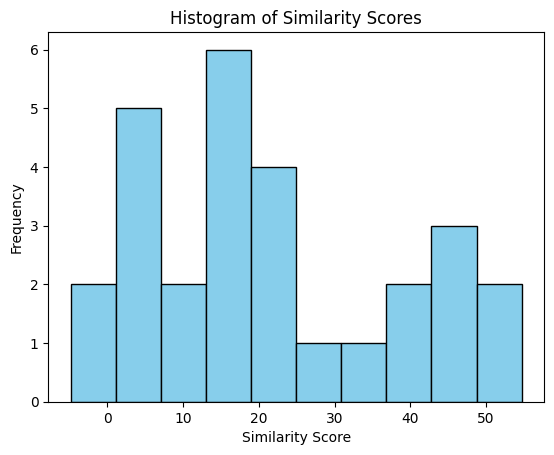

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(wordnet_wiki_similarity['similarity_score']*100, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Similarity Scores')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/NLP/Project/task_3_data/histogram.png', format='png', dpi=300)
plt.show()
